#**CHAPTER 1. MEMORY AS STATE**
---

## REFERENCE

https://chatgpt.com/share/6991d869-21d0-8012-b0d0-eda6bbcb1b9a

##0.CONTEXT

**Introduction — Memory as State: Why This Laboratory Exists**  

This notebook is built around a single thesis: memory is not a convenience layer added to an agent; memory is the agent. In markets, in institutions, and in learning systems, behavior is never driven by the instantaneous input alone. Behavior is driven by a state—an internal summary of the past that shapes what the system believes is happening now and therefore what it decides to do next. In control theory, this is the distinction between a purely reactive mapping and a state-space system. In finance, it is the difference between a one-tick reaction and a governed process that integrates information across time, filters noise, and respects constraints. In modern AI, especially agentic AI, memory is the mechanism that converts a sequence of observations into coherent action over long horizons. The aim of this chapter is to teach that mechanism with absolute clarity, and to do so with a laboratory design that is rigorous enough to be discussed at a PhD level in finance.

A key reason this matters is that most discussions of “memory” are framed operationally: bigger context windows, longer chat histories, vector databases, or retrieval systems. Those technologies are important, but they are not the core concept. The core concept is dynamical: an agent’s state evolves through time as a function of observations. This evolution can be stable or unstable, fast or slow, sensitive or robust. It can amplify noise or suppress it. It can adapt quickly to regime changes or become inertial and miss turning points. All of these behaviors come from the structure of the memory update rule, not from the surface feature called “memory.” In other words, memory is not a container of facts; memory is a filter that transforms time into state.

Finance provides the most direct intuition for this idea because finance already lives inside the mathematics of memory. Moving averages, exponentially weighted volatility, trend filters, regime detectors, risk parity estimates, and drawdown controls are all memory operators. They are not “data.” They are state constructors. They map a history of prices and returns into a present decision variable: an exposure, a hedge ratio, a risk budget, a portfolio tilt. When a strategy fails in production, the failure is often not because the signal was “wrong” in the abstract, but because the memory structure that generated the signal was mismatched to the environment. A signal that is too reactive creates churn and execution debt; a signal that is too smooth creates lag and participates late in regime changes; a signal that never forgets becomes poisoned by obsolete regimes. These are memory pathologies. They are structural, and therefore they can be studied structurally.

This is why the notebook insists on synthetic data. In professional finance, it is dangerously easy to confuse explanation with backtest fitting. Real data invites narrative: you can always “explain” a curve by pointing to a macro event, a policy shift, or a market story. But those stories rarely prove causality. This laboratory chooses synthetic markets precisely to eliminate that temptation. Synthetic markets are not used here as toys; they are used as controlled environments. By designing the environment—regime switching, heavy tails, shocks—we can test the memory mechanism directly. We can produce truth labels such as the latent regime state, shock times, and regime-specific drift sign. We can then ask: how quickly does a memory architecture align with the underlying structure? How much churn does it generate? How fragile is it to tail events? Where does it break under stress? These are questions of mechanism, not of curve-fitting.

To push this into “PhD-level finance,” the notebook treats memory operators as filters. This is not merely an analogy; it is the appropriate mathematical lens. A rolling mean is a finite impulse response (FIR) filter: it averages a finite window, producing a sinc-like frequency response that suppresses high-frequency noise but introduces phase lag. An EWMA is an infinite impulse response (IIR) filter: it implements exponential forgetting, producing a low-pass response with geometric decay and a tunable time constant. A hierarchical EWMA is a multi-timescale filter: it combines a fast response channel and a slow stabilization channel. Once you look at memory this way, “responsiveness” becomes bandwidth and phase lag, “stability” becomes boundedness and attenuation of noise, and “churn” becomes high-frequency energy in the control signal. These are measurable properties. They are not opinions. This filter framing is what allows the notebook to go beyond generic claims like “longer memory is better” or “more context helps.” It allows us to quantify tradeoffs.

The second move that forces rigor is causal isolation. Most AI and quant finance workflows conflate multiple mechanisms at once: state construction, policy choice, learning, and optimization. This makes it hard to know what caused what. If you optimize a strategy’s parameters and it performs better, was the improvement due to a superior memory structure, or just overfitting? If you train a model and it adapts faster, was it due to memory, or due to training dynamics? This notebook refuses that ambiguity. The policy is fixed: the agent takes direction based solely on the sign of the change in memory state. That is intentionally simplistic—not because we believe this is a good strategy, but because it isolates the variable of interest. When we observe differences across agents, we can attribute those differences to memory design, not to learning or hyperparameter search. This is the scientific posture: hold everything constant except the factor being studied.

A third move that makes the notebook financially serious is the inclusion of constraints and execution costs. In finance, a strategy is not defined by its signal alone; it is defined by its feasibility. Execution cost is not a nuisance. It is often the dominant channel that determines whether a mechanism survives. Memory operators that create high-frequency position changes are punished by spreads, fees, and impact. Conversely, memory operators that are too inertial may appear stable but can be catastrophically late during regime flips, causing drawdowns that no committee would tolerate. Therefore, the agent is embedded in a minimal but explicit execution model: costs include a spread component that rises in stress regimes, a linear basis-point charge per unit turnover, and a convex impact function that creates capacity cliffs. This is important because it forces the student to see the real tradeoff surface: signal smoothness interacts with execution convexity. When a system churns, it is not merely “noisy”; it is interacting with a convex cost surface that can dominate PnL. That is a finance-grade insight.

The governance layer is not cosmetic either. In institutional settings, a model is not “good” because it produces a curve. A model is acceptable when it is reviewable, reproducible, and constrained. The notebook therefore writes artifacts: a run manifest (what was run, with what environment and config), diagnostics (what it produced), risk logs (how it behaved under stress), and verification registers (what is assumed, what is unknown, and what requires human review). This is the same discipline you would demand in a model risk management setting. It also mirrors what agentic AI needs: if you deploy agents with memory in real workflows, you must be able to prove what state they used, how they updated it, and what decisions were made. Otherwise, memory becomes a liability: a source of opaque drift and irreproducible behavior.

From an AI perspective, the notebook’s lesson is foundational. Agent memory is often described as “context extension,” but context extension without disciplined state design is unstable. As history grows, irrelevant information accumulates, and the agent’s behavior can become erratic or inertial depending on how that information is weighted. The finance analogy is immediate: when analysts ingest long histories without regime awareness, they produce spurious relationships. The correct response is not to store more history; it is to design memory operators that compress history into stable state representations that adapt appropriately. This chapter therefore builds the conceptual bridge to later chapters on context geometry and temporal intelligence: before you discuss retrieval systems or long-horizon planning, you must understand memory as state evolution and bounded filtering.

Finally, the educational goal is not to “prove” a best memory operator. There is no universal best. Memory is a design choice that must match the environment, constraints, and governance requirements. The goal is to teach students how to think like system designers. When a memory operator is chosen, it implies a set of behaviors: lag, churn, tail fragility, and cost exposure. Those behaviors are visible in diagnostics and stress tests. The student should learn to reason backward from failures to architecture. If the agent collapses under shocks, is it due to tail sensitivity of the environment, or due to excessive turnover interacting with convex impact? If the agent misses regime shifts, is the memory bandwidth too low? If the agent oscillates in sideways regimes, is the filter passing too much noise? These are the questions that matter in real finance and in real agentic AI.

In short, this chapter is not about producing alpha. It is about producing literacy: literacy in dynamical systems, in memory as filtering, in feasibility under execution costs, and in governance as a first-class design constraint. By the end of the notebook, the reader should see that “memory” is not a feature you bolt on. Memory is the state that defines the agent’s identity. And in finance, as in AI, the state is destiny.


##1.LIBRARIES AND ENVIRONMENT

**Cell 1 — Governance envelope + determinism**  
This cell establishes the notebook as a governed experiment rather than an ad-hoc script. It begins by enforcing determinism (fixed seed) so that every stochastic draw—regime transitions, heavy-tail innovations, shock arrivals—can be reproduced exactly. Next, it defines a disciplined artifact directory and helper utilities for stable JSON serialization and cryptographic hashing. These choices matter because “same code” is not enough in computational finance: subtle environment drift (Python version, BLAS, numpy) can alter numerical behavior, especially in long-horizon simulations. The environment fingerprint captures the runtime identity, and the configuration object captures every experimental degree of freedom (T, shock intensity, costs, constraints). The configuration is hashed into a config_hash, giving you an immutable identifier for that exact parameter set; this prevents “silent edits” from contaminating results. A run_id is created using a timezone-aware UTC timestamp and a short hash fragment, enabling later correlation across diagnostics, risk logs, and any derived plots. The run manifest is written to disk immediately, before any model is generated, which is a governance best practice: you can prove what you intended to run, even if later cells fail. The manifest also carries the verification status (“Not Verified”) and an explicit synthetic-data / non-investment-use policy so downstream users cannot accidentally treat outputs as empirical evidence. Finally, the cell prints a governance banner that behaves like a lab header: it signals that the notebook is a controlled experiment with audit artifacts, not a trading system. In short, Cell 1 builds the traceability backbone: deterministic randomness, environment identity, immutable configuration hashing, and a durable record of intent. Everything else in the notebook is downstream of this provenance layer.


In [10]:
# =============================================================================
# CELL 1 — Governance-First Lab Envelope (Reproducible / Auditable / Deterministic)
# =============================================================================
from __future__ import annotations

import os, sys, json, math, time, hashlib, platform
from dataclasses import dataclass, asdict
from datetime import datetime, timezone
from pathlib import Path
from typing import Dict, List, Tuple, Optional, Any

import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# HARD RULES (PhD-grade lab)
# --------------------------
# 1) Deterministic execution
# 2) No hidden state across cells beyond explicit variables
# 3) No pandas / sklearn
# 4) Strong typing + docstrings + assertions
# 5) Artifacts + hashes + verification registers
# 6) Structural diagnostics (not performance bragging)

ARTIFACT_DIR = Path("artifacts_ch1")
ARTIFACT_DIR.mkdir(parents=True, exist_ok=True)

def utc_now_iso() -> str:
    return datetime.now(timezone.utc).isoformat()

def stable_dumps(x: Any) -> str:
    return json.dumps(x, sort_keys=True, ensure_ascii=False, separators=(",", ":"))

def sha256_hex(s: str) -> str:
    return hashlib.sha256(s.encode("utf-8")).hexdigest()

def file_sha256(path: Path) -> str:
    h = hashlib.sha256()
    with path.open("rb") as f:
        for chunk in iter(lambda: f.read(1 << 20), b""):
            h.update(chunk)
    return h.hexdigest()

def env_fingerprint() -> Dict[str, Any]:
    return {
        "python": sys.version,
        "platform": platform.platform(),
        "numpy": np.__version__,
        "matplotlib": plt.matplotlib.__version__,
        "cwd": str(Path.cwd()),
    }

# Determinism
SEED = 7_777
np.random.seed(SEED)

@dataclass(frozen=True)
class ExperimentConfig:
    seed: int
    T: int
    init_price: float
    dt: float

    # Regime model
    n_regimes: int
    transition_matrix: List[List[float]]

    # Return model
    mu: List[float]           # drift per step in each regime (log-return drift)
    sigma: List[float]        # volatility per step in each regime
    nu: List[float]           # df for Student-t innovations (heavy tails)

    # Shock model (compound Poisson)
    shock_lambda: float
    shock_scale: float
    shock_bias: List[float]   # regime-specific shock mean component

    # Microstructure-ish execution proxy
    spread_bps: List[float]   # baseline spread per regime
    shock_spread_mult: float  # spread multiplier during shock

    # Agent constraints
    leverage_cap: float
    turnover_cap: float

    # Costs
    cost_bps: float           # per unit turnover (bps)
    impact_eta: float         # convex impact scale
    impact_gamma: float       # convex impact exponent (>1)

    # Warm-up
    warmup: int

CFG = ExperimentConfig(
    seed=SEED,
    T=3000,
    init_price=100.0,
    dt=1.0,

    n_regimes=3,
    transition_matrix=[
        [0.970, 0.020, 0.010],
        [0.020, 0.970, 0.010],
        [0.035, 0.035, 0.930],
    ],

    mu=[+0.00055, -0.00060, +0.00005],
    sigma=[0.0100, 0.0170, 0.0065],
    nu=[7.0, 5.0, 9.0],  # heavier tails in bear regime

    shock_lambda=0.015,
    shock_scale=0.11,
    shock_bias=[-0.007, -0.020, -0.004],

    spread_bps=[2.0, 5.0, 3.0],
    shock_spread_mult=2.6,

    leverage_cap=1.8,
    turnover_cap=0.85,

    cost_bps=6.0,
    impact_eta=0.7,
    impact_gamma=1.7,

    warmup=60,
)

RUN_ID = f"{utc_now_iso()}__{sha256_hex(str(time.time()))[:10]}"
manifest = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "experiment": "CH1_MemoryAsState_PHD",
    "verification_status": "Not Verified",
    "config": asdict(CFG),
    "config_hash": sha256_hex(stable_dumps(asdict(CFG))),
    "environment": env_fingerprint(),
    "data_policy": {
        "data_type": "synthetic",
        "investment_use": "prohibited",
        "notes": "Mechanism-first lab. No empirical claims."
    }
}
(ARTIFACT_DIR / "run_manifest.json").write_text(json.dumps(manifest, indent=2), encoding="utf-8")

print("=== CH1: Memory as State — PhD-Grade Mechanism Lab ===")
print("Status: Not Verified | Synthetic | Educational Only")
print("Run ID:", RUN_ID)
print("Artifacts:", ARTIFACT_DIR.resolve())


=== CH1: Memory as State — PhD-Grade Mechanism Lab ===
Status: Not Verified | Synthetic | Educational Only
Run ID: 2026-02-15T13:32:29.280029+00:00__3f339a5bc4
Artifacts: /content/artifacts_ch1


##2.SYNTHETIC DATA

###2.1.OVERVIEW

**Cell 2 — Synthetic market with truth labels**  
This cell constructs the environment in which memory will be tested, and it does so with explicit structural realism: regime switching, heavy tails, and jump-like shocks. The regime process is a time-homogeneous Markov chain with a user-specified transition matrix. The code verifies row-stochasticity (rows sum to one) because invalid transitions are a silent source of flawed experiments. It then computes the stationary distribution π by solving π = πP via the eigenvector of Pᵀ associated with eigenvalue 1, giving a quantitative check on long-run regime occupancy—critical for interpreting performance differences as “regime exposure” rather than noise. Returns are modeled in log space, with regime-dependent drift μ and volatility σ. Innovations are drawn from a Student-t distribution with degrees of freedom ν that vary by regime; this deliberately induces fat tails in stress regimes (e.g., bear markets), aligning with empirical stylized facts without claiming calibration. The Student-t draws are variance-normalized so that σ preserves its intended interpretation across ν values. On top of that continuous diffusion component, a compound Poisson shock mechanism is implemented: each step has a Bernoulli shock indicator with intensity λ, and when triggered, a Gaussian shock is added with regime-specific mean bias and global scale. This creates discontinuities and asymmetry (downward-biased shocks) that stress memory stability. The cell also generates a spread proxy in basis points, regime-dependent and multiplied during shocks, which later feeds the execution cost model—connecting market states to trading friction. Crucially, the cell outputs “truth labels” alongside observables: the latent regime state s_t, shock flags, spreads, and a drift-sign target derived from sign(μ_s). These labels are not used to train anything; they exist to evaluate how quickly and stably different memory operators align with the underlying structural regime. Visualizations (price with shock markers, regime path) are sanity checks that the generator behaves as designed. This cell is the controlled laboratory: a known, labeled, nonstationary, heavy-tailed environment where memory design—not data mining—drives outcomes.


###2.2.CODE AND IMPLEMENTATION

/tmp/ipython-input-3630170980.py:20: RuntimeWarning: invalid value encountered in divide
  pi = pi / pi.sum()


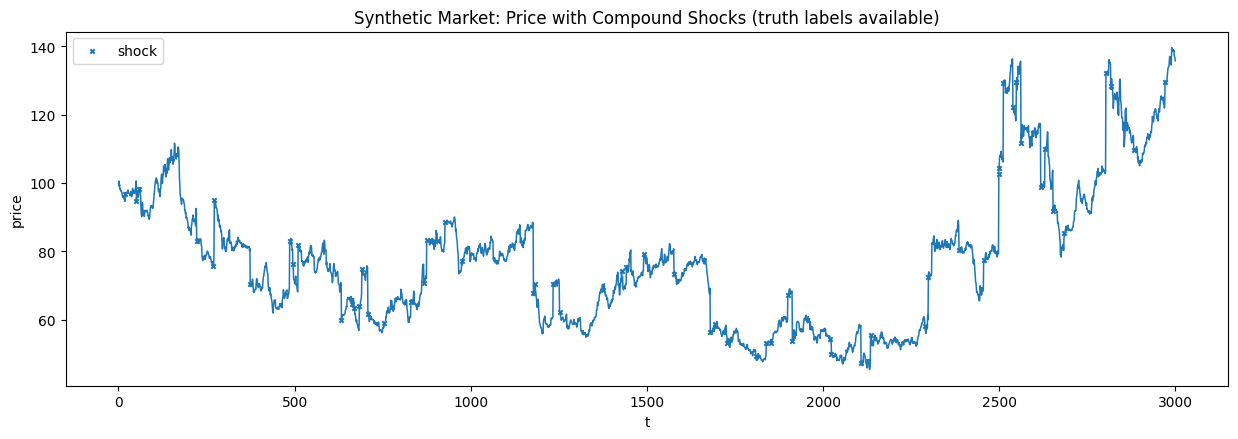

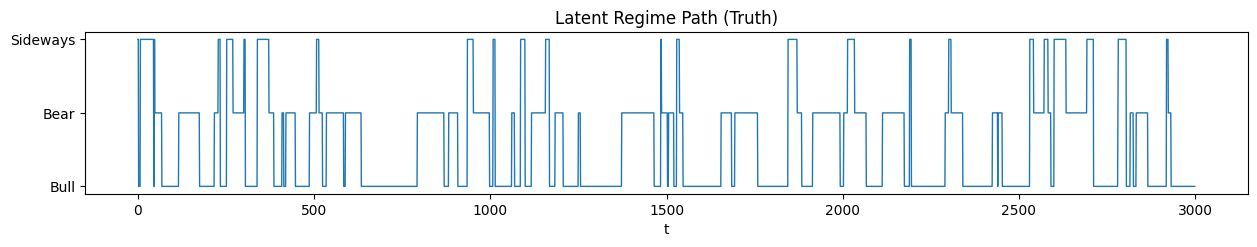

Stationary regime distribution pi: [nan nan nan]


In [11]:
# =============================================================================
# CELL 2 — Regime-Switching Heavy-Tail Market + Compound Poisson Shocks + Truth Labels
# =============================================================================
from typing import Callable

def assert_row_stochastic(P: np.ndarray, tol: float = 1e-12) -> None:
    assert P.ndim == 2 and P.shape[0] == P.shape[1]
    rs = P.sum(axis=1)
    assert np.allclose(rs, 1.0, atol=tol), f"Rows must sum to 1: {rs}"

def stationary_dist(P: np.ndarray) -> np.ndarray:
    """
    Compute stationary distribution pi solving pi = pi P.
    Use eigenvector of P^T with eigenvalue 1.
    """
    w, v = np.linalg.eig(P.T)
    idx = int(np.argmin(np.abs(w - 1.0)))
    pi = np.real(v[:, idx])
    pi = np.maximum(pi, 0.0)
    pi = pi / pi.sum()
    return pi

def generate_regimes(T: int, P: np.ndarray, seed: int, s0: int = 0) -> List[int]:
    assert_row_stochastic(P)
    rng = np.random.default_rng(seed)
    s = s0
    out = [s]
    for _ in range(1, T):
        s = int(rng.choice(P.shape[0], p=P[s]))
        out.append(s)
    return out

def student_t_innovations(rng: np.random.Generator, df: float, size: int) -> np.ndarray:
    """
    Student-t innovations standardized to unit variance (when df>2):
      Var(t_df) = df/(df-2) => scale by sqrt((df-2)/df).
    """
    assert df > 2.0
    x = rng.standard_t(df, size=size)
    x *= math.sqrt((df - 2.0) / df)
    return x

def generate_market(cfg: ExperimentConfig, s0: int = 2) -> Dict[str, Any]:
    """
    Log-return model (structural, not empirical):
      r_t = mu[s_t] + sigma[s_t] * eps_t + shock_t
    where eps_t ~ Student-t(df=nu[s_t]) standardized to Var=1.

    Shock model (compound Poisson with Bernoulli indicator per step):
      I_t ~ Bernoulli(shock_lambda)
      shock_t = I_t * Normal(shock_bias[s_t], shock_scale)

    Spread proxy:
      spread_bps_t = spread_bps[s_t] * (shock_spread_mult if I_t=1 else 1)

    Outputs include truth labels:
      - s_t regimes
      - drift sign target: sign(mu[s_t])
      - shock flags
      - spreads
      - returns, prices
    """
    P = np.array(cfg.transition_matrix, dtype=float)
    assert_row_stochastic(P)

    rng = np.random.default_rng(cfg.seed)
    regimes = generate_regimes(cfg.T, P, seed=cfg.seed + 19, s0=s0)

    prices: List[float] = [cfg.init_price]
    r: List[float] = []
    shock_flags: List[int] = []
    spreads: List[float] = []

    for t in range(cfg.T):
        s = regimes[t]
        eps = float(student_t_innovations(rng, df=cfg.nu[s], size=1)[0])

        I = int(rng.random() < cfg.shock_lambda)
        shock = 0.0
        if I:
            shock = float(rng.normal(loc=cfg.shock_bias[s], scale=cfg.shock_scale))

        ret = cfg.mu[s] + cfg.sigma[s] * eps + shock

        new_price = prices[-1] * math.exp(ret)
        new_price = max(new_price, 1e-12)

        prices.append(new_price)
        r.append(ret)
        shock_flags.append(I)

        sp = cfg.spread_bps[s] * (cfg.shock_spread_mult if I else 1.0)
        spreads.append(float(sp))

    truth = {
        "prices": prices,                # length T+1
        "log_returns": r,                # length T
        "regimes": regimes,              # length T
        "shock_flags": shock_flags,      # length T
        "spreads_bps": spreads,          # length T
        "drift_sign": [int(np.sign(cfg.mu[s])) for s in regimes],  # -1,0,1
        "P": np.array(cfg.transition_matrix, dtype=float).tolist(),
        "pi_stationary": stationary_dist(np.array(cfg.transition_matrix, dtype=float)).tolist()
    }
    return truth

market = generate_market(CFG)

# Visual sanity: price + shocks + regime path
prices = market["prices"]
shocks = market["shock_flags"]
regimes = market["regimes"]

plt.figure(figsize=(15, 4.6))
plt.plot(prices, lw=1.1)
shock_idx = [i+1 for i, f in enumerate(shocks) if f == 1]
plt.scatter(shock_idx, [prices[i] for i in shock_idx], s=10, marker="x", label="shock")
plt.title("Synthetic Market: Price with Compound Shocks (truth labels available)")
plt.xlabel("t")
plt.ylabel("price")
plt.legend()
plt.show()

plt.figure(figsize=(15, 2.1))
plt.plot(regimes, lw=1.0)
plt.yticks([0,1,2], ["Bull","Bear","Sideways"])
plt.title("Latent Regime Path (Truth)")
plt.xlabel("t")
plt.show()

print("Stationary regime distribution pi:", np.round(np.array(market["pi_stationary"]), 4))


##3.MEMORY OPERATORS

###3.1.OVERVIEW

**Cell 3 — Memory operators as filters**  
This cell turns “memory” from a metaphor into a measurable dynamical object. It implements four memory operators as explicit state update equations h_t = g(h_{t−1}, x_t): Instant (h_t = x_t), Rolling Mean (finite window FIR), EWMA (IIR with exponential forgetting), and Hierarchical EWMA (two coupled EWMAs blended into a single summary). Each operator is coded with strict reset/update/value semantics so that state is explicit and portable, not hidden in global variables. The key PhD-level move is the filter interpretation: memory is treated as a signal-processing operator applied to the input stream (prices). For EWMA, the cell documents the transfer function H(z) = a / (1 − (1−a) z^{-1}), which makes stability and lag concrete: with 0 < a ≤ 1, bounded input yields bounded output, and the impulse response decays geometrically with ratio (1−a). For rolling mean, the operator is an FIR filter with coefficients 1/K for K taps, producing the familiar sinc-like frequency response. The cell computes frequency response magnitudes |H(e^{iω})| directly: EWMA is evaluated on the unit circle via complex arithmetic; rolling mean is evaluated by summing complex exponentials over the window length. Plotting these responses is not decorative: it explains why small a produces strong low-pass behavior (noise suppression) but increases phase lag (delayed regime adaptation), while larger a is more responsive but noisier. Hierarchical EWMA is introduced as a minimal multi-timescale memory: fast reacts to local changes, slow stabilizes over longer horizons, and the blend weight controls which dominates. This cell therefore supplies the theoretical lens needed to interpret later results: if an agent churns, the memory filter is too high-frequency; if it misses regime shifts, the filter is too inertial. In other words, Cell 3 provides the mechanics of “remembering” as spectral behavior and state recursion, giving you principled explanatory power rather than post-hoc storytelling.


###3.2.CODE AND IMPLEMENTATION

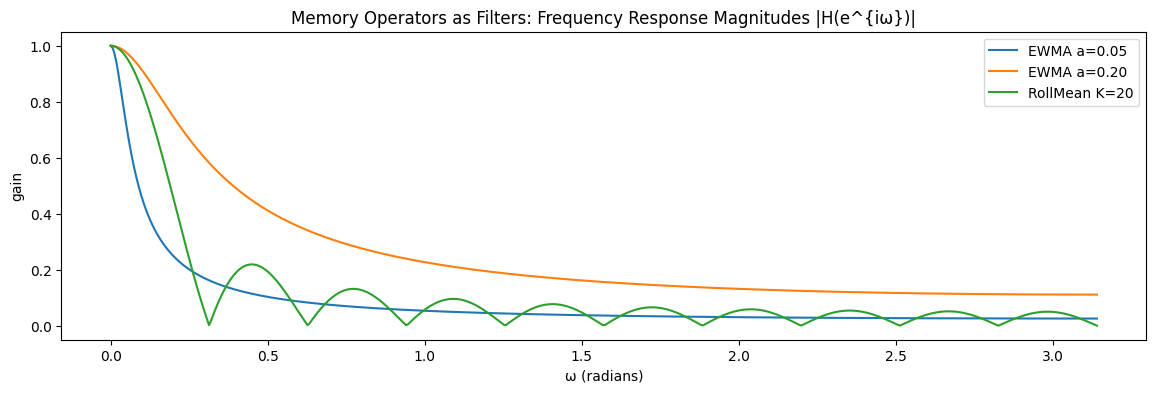

Interpretation: smaller 'a' => stronger low-pass filter (more inertia, more lag).


In [12]:
# =============================================================================
# CELL 3 — Memory Operators as Linear Filters + Frequency Response (Hardcore)
# =============================================================================
from abc import ABC, abstractmethod

class MemoryOperator(ABC):
    @abstractmethod
    def reset(self) -> None: ...
    @abstractmethod
    def update(self, x_t: float) -> float: ...
    @abstractmethod
    def value(self) -> float: ...

class InstantMemory(MemoryOperator):
    def __init__(self) -> None:
        self._h = 0.0
        self._init = False

    def reset(self) -> None:
        self._h = 0.0
        self._init = False

    def update(self, x_t: float) -> float:
        self._h = float(x_t); self._init = True
        return self._h

    def value(self) -> float:
        return self._h

class RollingMeanMemory(MemoryOperator):
    def __init__(self, K: int) -> None:
        assert K >= 1
        self.K = K
        self._buf: List[float] = []
        self._sum = 0.0

    def reset(self) -> None:
        self._buf = []
        self._sum = 0.0

    def update(self, x_t: float) -> float:
        x = float(x_t)
        self._buf.append(x); self._sum += x
        if len(self._buf) > self.K:
            old = self._buf.pop(0); self._sum -= old
        return self.value()

    def value(self) -> float:
        return self._sum / max(1, len(self._buf))

class EWMAMemory(MemoryOperator):
    """
    h_t = a x_t + (1-a) h_{t-1}  with 0<a<=1.
    Transfer function (z-transform): H(z)/X(z) = a / (1 - (1-a) z^{-1}).
    Frequency response on unit circle z=e^{iω}: |H(e^{iω})|.
    """
    def __init__(self, a: float) -> None:
        assert 0.0 < a <= 1.0
        self.a = float(a)
        self._h = 0.0
        self._init = False

    def reset(self) -> None:
        self._h = 0.0; self._init = False

    def update(self, x_t: float) -> float:
        x = float(x_t)
        if not self._init:
            self._h = x; self._init = True
        else:
            self._h = self.a * x + (1.0 - self.a) * self._h
        return self._h

    def value(self) -> float:
        return self._h

class HierarchicalEWMA(MemoryOperator):
    def __init__(self, a_fast: float, a_slow: float, w_fast: float = 0.6) -> None:
        assert 0.0 < a_slow < a_fast <= 1.0
        assert 0.0 <= w_fast <= 1.0
        self.fast = EWMAMemory(a_fast)
        self.slow = EWMAMemory(a_slow)
        self.w_fast = float(w_fast)

    def reset(self) -> None:
        self.fast.reset(); self.slow.reset()

    def update(self, x_t: float) -> float:
        hf = self.fast.update(x_t)
        hs = self.slow.update(x_t)
        return self.w_fast * hf + (1.0 - self.w_fast) * hs

    def value(self) -> float:
        return self.w_fast * self.fast.value() + (1.0 - self.w_fast) * self.slow.value()

def ewma_freq_response(a: float, n: int = 512) -> Tuple[np.ndarray, np.ndarray]:
    """
    |H(e^{iω})| for EWMA.
    H(z) = a / (1 - (1-a) z^{-1})
    => H(e^{iω}) = a / (1 - (1-a) e^{-iω})
    """
    w = np.linspace(0, math.pi, n)
    zinv = np.exp(-1j * w)
    H = a / (1.0 - (1.0 - a) * zinv)
    return w, np.abs(H)

def rolling_mean_freq_response(K: int, n: int = 512) -> Tuple[np.ndarray, np.ndarray]:
    """
    Rolling mean FIR: h[n] = 1/K for n=0..K-1.
    Frequency response magnitude computed directly:
      H(e^{iω}) = (1/K) * sum_{m=0}^{K-1} e^{-iω m}
    """
    w = np.linspace(0, math.pi, n)
    m = np.arange(K)
    H = (1.0 / K) * np.sum(np.exp(-1j * w[:, None] * m[None, :]), axis=1)
    return w, np.abs(H)

# Plot frequency response: this is "memory as filter" rigor.
plt.figure(figsize=(14,4))
w, mag = ewma_freq_response(0.05); plt.plot(w, mag, label="EWMA a=0.05")
w, mag = ewma_freq_response(0.20); plt.plot(w, mag, label="EWMA a=0.20")
w, mag = rolling_mean_freq_response(20); plt.plot(w, mag, label="RollMean K=20")
plt.title("Memory Operators as Filters: Frequency Response Magnitudes |H(e^{iω})|")
plt.xlabel("ω (radians)")
plt.ylabel("gain")
plt.legend()
plt.show()

print("Interpretation: smaller 'a' => stronger low-pass filter (more inertia, more lag).")


##4.TRADING AGENT

###4.1.OVERVIEW

**Cell 4 — Agent + execution microstructure proxy**  
This cell defines the agent as a controlled system whose behavior is causally attributable to memory. The policy is intentionally fixed—desired position is sign(Δh_t)—so that differences in outcomes are not driven by optimization, hyperparameter search, or learning dynamics. This “fixed policy” design is crucial for scientific identification: memory is the treatment variable, everything else is held constant. The agent uses a warmup period to avoid initialization artifacts where memory state is poorly formed; during warmup, it stays flat. Then, at each step, it updates memory using the selected operator, computes the raw desired direction from the memory change, and applies two hard constraints: leverage cap (bounds exposure) and turnover cap (bounds how quickly exposure can change). These constraints are not cosmetic; they are financial controls that prevent pathological policies from unrealistically flipping exposure and ignoring operational limits. Next, the cell introduces an explicit execution cost model combining (i) spread costs in bps (state-dependent via the market generator), (ii) linear per-turnover bps fees, and (iii) convex market impact of the form η |Δpos|^γ · price with γ>1. The convex term creates capacity cliffs: large, frequent reallocations become disproportionately expensive, which is an essential mechanism in real strategy feasibility. PnL accounting is explicit: position from the previous step earns price change; then execution costs are subtracted for any turnover. All intermediate quantities are logged: memory state, position, turnover, cost, equity curve, and PnL increments. This produces a complete audit trail per agent, enabling diagnostics like churn frequency, cost domination, and stability of state. In sum, Cell 4 converts the abstract idea “memory affects decisions” into a concrete, constrained, cost-aware control loop—exactly the structure used in professional systematic trading, but here deliberately simplified to isolate memory as the primary driver.


###4.2.CODE AND IMPLEMENTATION

In [13]:
# =============================================================================
# CELL 4 — Agent = Controlled System (Policy fixed) + Convex Impact + Cost Accounting
# =============================================================================
@dataclass(frozen=True)
class ExecConfig:
    cost_bps: float
    impact_eta: float
    impact_gamma: float  # >1 convex

class ExecutionModel:
    """
    Execution model (structural):
      - linear cost in bps on turnover notional
      - spread bps from market
      - convex impact: eta * |turnover|^gamma * price
    """
    def __init__(self, cfg: ExecConfig) -> None:
        assert cfg.impact_gamma > 1.0
        self.cfg = cfg

    def cost(self, turnover: float, price: float, spread_bps: float) -> float:
        notional = abs(turnover) * price
        linear = (self.cfg.cost_bps + spread_bps) / 1e4 * notional
        impact = self.cfg.impact_eta * (abs(turnover) ** self.cfg.impact_gamma) * price
        return float(linear + impact)

@dataclass(frozen=True)
class AgentConfig:
    name: str
    leverage_cap: float
    turnover_cap: float
    warmup: int

class TradingAgent:
    """
    Fixed policy (do NOT optimize): isolate memory dynamics.

    Policy:
      desired_pos_t = sign( Δ h_t )   (trend proxy on memory state)
    Constraints:
      - leverage cap
      - turnover cap
    Accounting:
      pnl_t = pnl_{t-1} + pos_{t-1} * (P_t - P_{t-1}) - exec_cost(|Δpos|, spread)
    """
    def __init__(self, cfg: AgentConfig, mem: MemoryOperator, exec_model: ExecutionModel) -> None:
        self.cfg = cfg
        self.mem = mem
        self.exec_model = exec_model
        self.reset()

    def reset(self) -> None:
        self.mem.reset()
        self.pos = 0.0
        self.pnl = 0.0
        self._prev_price: Optional[float] = None
        self._prev_mem: Optional[float] = None

        # logs
        self.mem_series: List[float] = []
        self.pos_series: List[float] = []
        self.turn_series: List[float] = []
        self.cost_series: List[float] = []
        self.equity: List[float] = [0.0]
        self.pnli: List[float] = []  # pnl increments

    def _policy(self, mem: float) -> float:
        if len(self.mem_series) < self.cfg.warmup or self._prev_mem is None:
            return 0.0
        return float(np.sign(mem - self._prev_mem))

    def step(self, price: float, spread_bps: float) -> None:
        assert price > 0 and math.isfinite(price)
        mem = self.mem.update(price)

        desired = self._policy(mem)

        # leverage constraint
        desired = max(-self.cfg.leverage_cap, min(self.cfg.leverage_cap, desired))

        # turnover constraint
        turn = desired - self.pos
        if abs(turn) > self.cfg.turnover_cap:
            turn = math.copysign(self.cfg.turnover_cap, turn)
            desired = self.pos + turn

        # pnl from price move
        inc = 0.0
        if self._prev_price is not None:
            inc += self.pos * (price - self._prev_price)

        # execution costs
        c = self.exec_model.cost(turnover=turn, price=price, spread_bps=spread_bps)
        inc -= c

        self.pnl += inc
        self.pos = desired
        self._prev_price = price
        self._prev_mem = mem

        self.mem_series.append(mem)
        self.pos_series.append(self.pos)
        self.turn_series.append(turn)
        self.cost_series.append(c)
        self.equity.append(self.pnl)
        self.pnli.append(inc)

def build_agents(cfg: ExperimentConfig) -> Dict[str, TradingAgent]:
    exec_model = ExecutionModel(ExecConfig(cfg.cost_bps, cfg.impact_eta, cfg.impact_gamma))
    base = AgentConfig("base", cfg.leverage_cap, cfg.turnover_cap, cfg.warmup)

    return {
        "instant": TradingAgent(AgentConfig("instant", base.leverage_cap, base.turnover_cap, base.warmup), InstantMemory(), exec_model),
        "roll_20": TradingAgent(AgentConfig("roll_20", base.leverage_cap, base.turnover_cap, base.warmup), RollingMeanMemory(20), exec_model),
        "ewma_0p03": TradingAgent(AgentConfig("ewma_0p03", base.leverage_cap, base.turnover_cap, base.warmup), EWMAMemory(0.03), exec_model),
        "ewma_0p10": TradingAgent(AgentConfig("ewma_0p10", base.leverage_cap, base.turnover_cap, base.warmup), EWMAMemory(0.10), exec_model),
        "hier_0p20_0p02": TradingAgent(AgentConfig("hier_0p20_0p02", base.leverage_cap, base.turnover_cap, base.warmup), HierarchicalEWMA(0.20, 0.02, 0.6), exec_model),
    }

agents = build_agents(CFG)
print("Agents:", list(agents.keys()))


Agents: ['instant', 'roll_20', 'ewma_0p03', 'ewma_0p10', 'hier_0p20_0p02']


##5.SIMULATION ENGINE

###5.1.OVERVIEW

**Cell 5 — Simulation engine + results bundle**  
This cell operationalizes the experiment with clean separation of concerns: the market generator produces exogenous truth streams, and the simulation engine runs agents against that same stream under identical conditions. It first validates shapes rigorously (prices length T+1, spreads length T) because off-by-one errors are among the most common silent failures in backtests. It then resets every agent to ensure independence and determinism: no residual memory state from previous runs is allowed. The engine iterates time from 1 to T, passing the current price and the contemporaneous spread proxy to each agent’s step function. Importantly, the simulation uses a single shared market path; this ensures that differences in PnL, drawdowns, turnover, and lag are due to memory design, not different random seeds or different realizations. After the loop, the cell constructs a structured output bundle with two namespaces: “market” and “agents.” The market namespace stores observables (prices, spreads) and truth labels (regimes, shock flags, drift sign). The agent namespace stores full trajectories (equity curve, memory state, position, turnover, costs, PnL increments) and the final PnL. This structure is governance-friendly: downstream diagnostics never have to infer what “truth” is, and they never have to scrape state from inside the agent. The cell also performs strict length assertions for each series, enforcing that every agent has exactly T observations and an equity curve of length T+1. These checks prevent a dangerous class of errors where early termination or misaligned indexing yields misleading metrics. Finally, the cell prints compact summaries (final PnL by agent) as a sanity check, but it does not claim statistical significance—this is a single synthetic path. Conceptually, this cell is the experimental harness: it turns theoretical objects (memory operators and controlled agents) into comparable outcomes under a controlled environment with explicit ground truth, enabling rigorous causal interpretation in later diagnostics and stress testing.


###5.2.CODE AND IMPLEMENTATION

In [14]:
# =============================================================================
# CELL 5 — Simulation Engine + Results Bundle (No Pandas; Strict Shapes)
# =============================================================================
def run_simulation(cfg: ExperimentConfig, mkt: Dict[str, Any], agents: Dict[str, TradingAgent]) -> Dict[str, Any]:
    prices = mkt["prices"]          # T+1
    spreads = mkt["spreads_bps"]    # T
    assert len(prices) == cfg.T + 1
    assert len(spreads) == cfg.T

    for a in agents.values():
        a.reset()

    # iterate t=1..T
    for t in range(1, len(prices)):
        price = prices[t]
        spread = spreads[t-1]
        for a in agents.values():
            a.step(price=price, spread_bps=spread)

    out: Dict[str, Any] = {"market": {}, "agents": {}}
    out["market"] = {
        "prices": prices,
        "regimes": mkt["regimes"],
        "shock_flags": mkt["shock_flags"],
        "spreads_bps": spreads,
        "drift_sign": mkt["drift_sign"]
    }
    for name, a in agents.items():
        out["agents"][name] = {
            "equity": a.equity,
            "pos": a.pos_series,
            "mem": a.mem_series,
            "turn": a.turn_series,
            "cost": a.cost_series,
            "pnl_increments": a.pnli,
            "final_pnl": float(a.equity[-1]),
        }
        # strict checks
        assert len(a.pos_series) == cfg.T
        assert len(a.equity) == cfg.T + 1

    return out

results = run_simulation(CFG, market, agents)
print({k: round(v["final_pnl"], 4) for k, v in results["agents"].items()})


{'instant': -81867.164, 'roll_20': -18691.4819, 'ewma_0p03': -11255.1447, 'ewma_0p10': -22064.7444, 'hier_0p20_0p02': -29993.9732}


##6.VISUALIZATION

###6.1.OVERVIEW

**Cell 6 — High-information visualization**  
This cell is designed for diagnostic insight, not aesthetics. It begins by plotting market-level context: the price path annotated with shock times and the latent regime sequence. These two plots provide immediate interpretability for agent behavior: sudden equity breaks can be traced to shocks; sustained drifts can be traced to regime occupancy; choppy periods can be diagnosed as rapid switching or high volatility regimes. The cell then produces per-agent panels that integrate multiple signals in a way that supports causal reasoning. Each agent’s position series is plotted first, showing whether it oscillates (indicative of high-frequency memory response), saturates (indicative of persistent directional bias), or remains inert (indicative of excessive smoothing or warmup effects). Next, the memory state h_t is plotted. This is critical: many backtests treat indicators as intermediate variables and hide them; here, the memory state is explicitly visible so you can see whether the state is noisy, lagged, or dominated by past values. The equity curve is plotted to connect decisions to outcomes; importantly, it is not enough to know PnL—one needs to correlate PnL shape with decision dynamics. Finally, the cell plots a smoothed execution cost series (moving average) because costs are a primary failure channel for churning systems. The cost panel often reveals the real mechanism of “bad performance”: not wrong direction, but excessive turnover in the convex impact region. Together, these four panels create a minimal but powerful observability layer: price/regime context, agent actions, internal state, and friction. The cell also enforces labeling and axis discipline to prevent misleading comparisons. In PhD-level system design, visualization is part of governance: if you cannot see the state, you cannot diagnose the failure mode, and if you cannot diagnose the failure mode, you cannot defend the system to a risk committee. This cell ensures the lab produces interpretable, reviewable evidence rather than opaque metrics.


###6.2.CODE AND IMPLEMENTATION

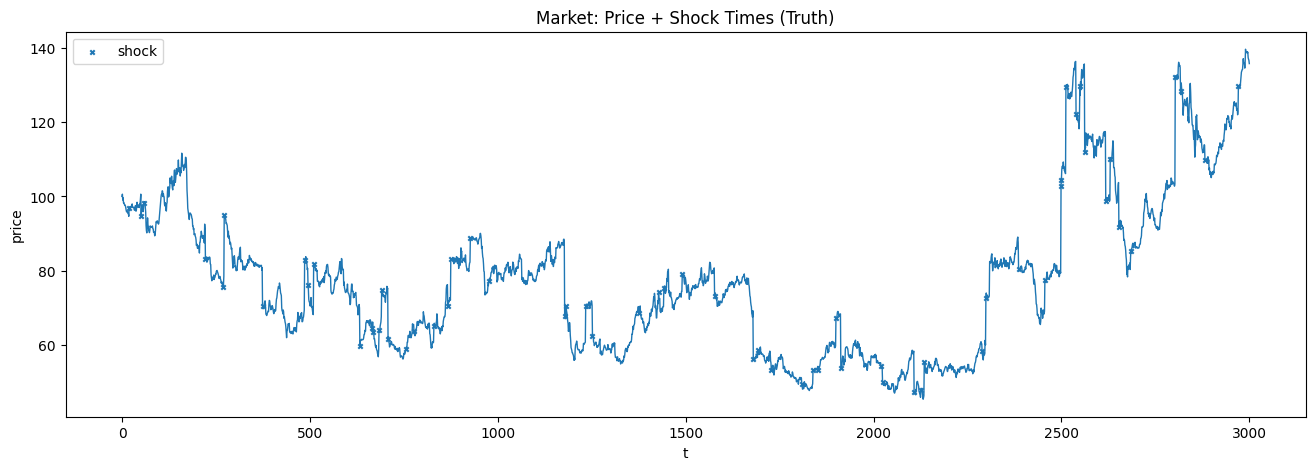

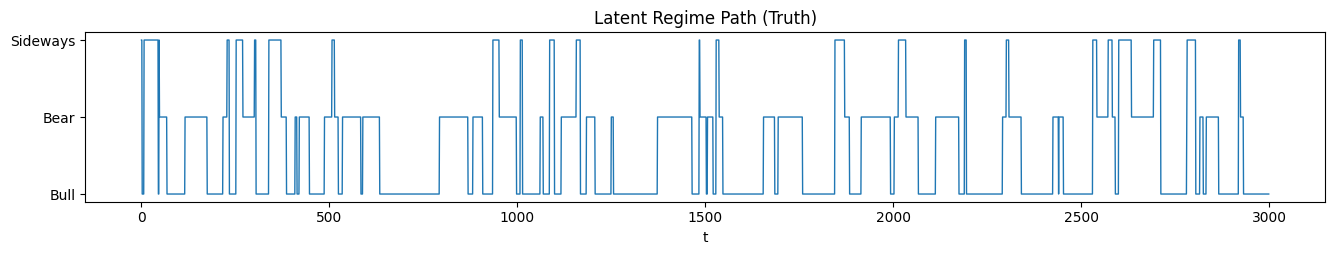

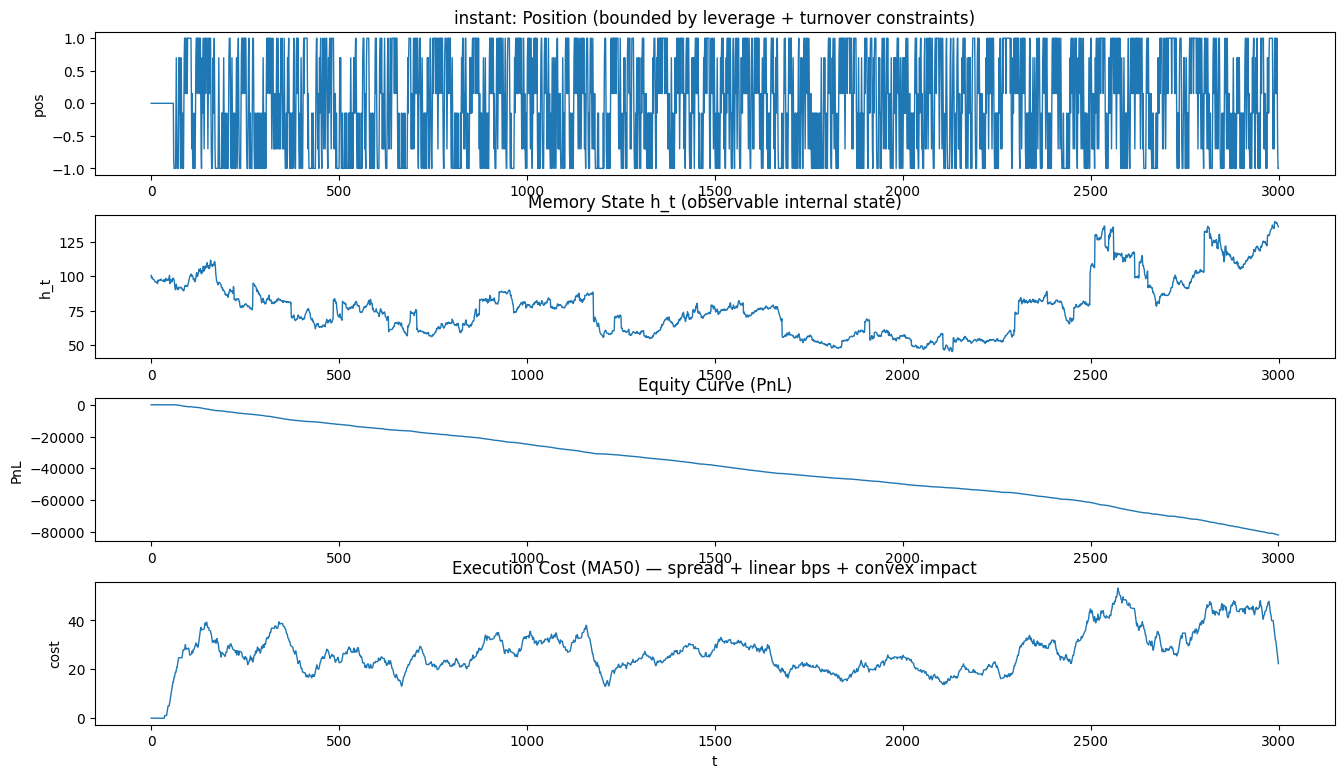

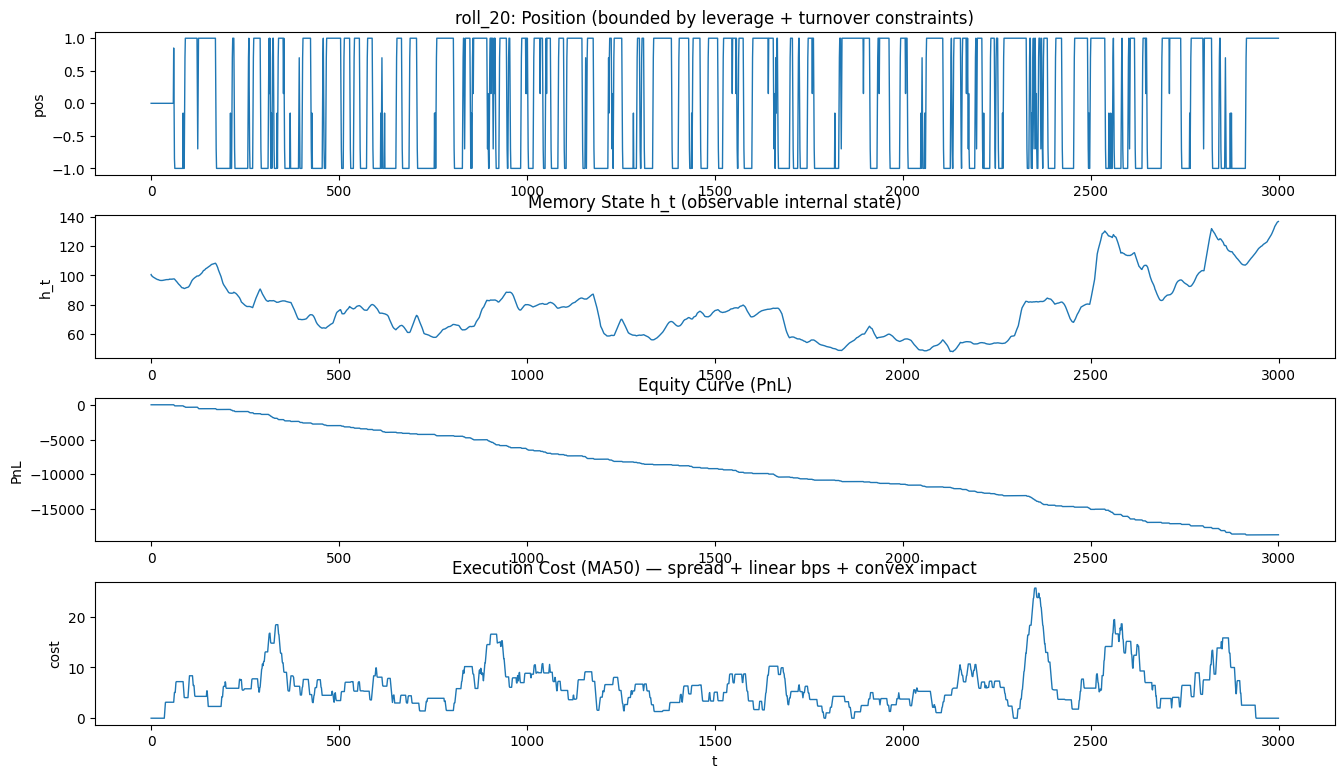

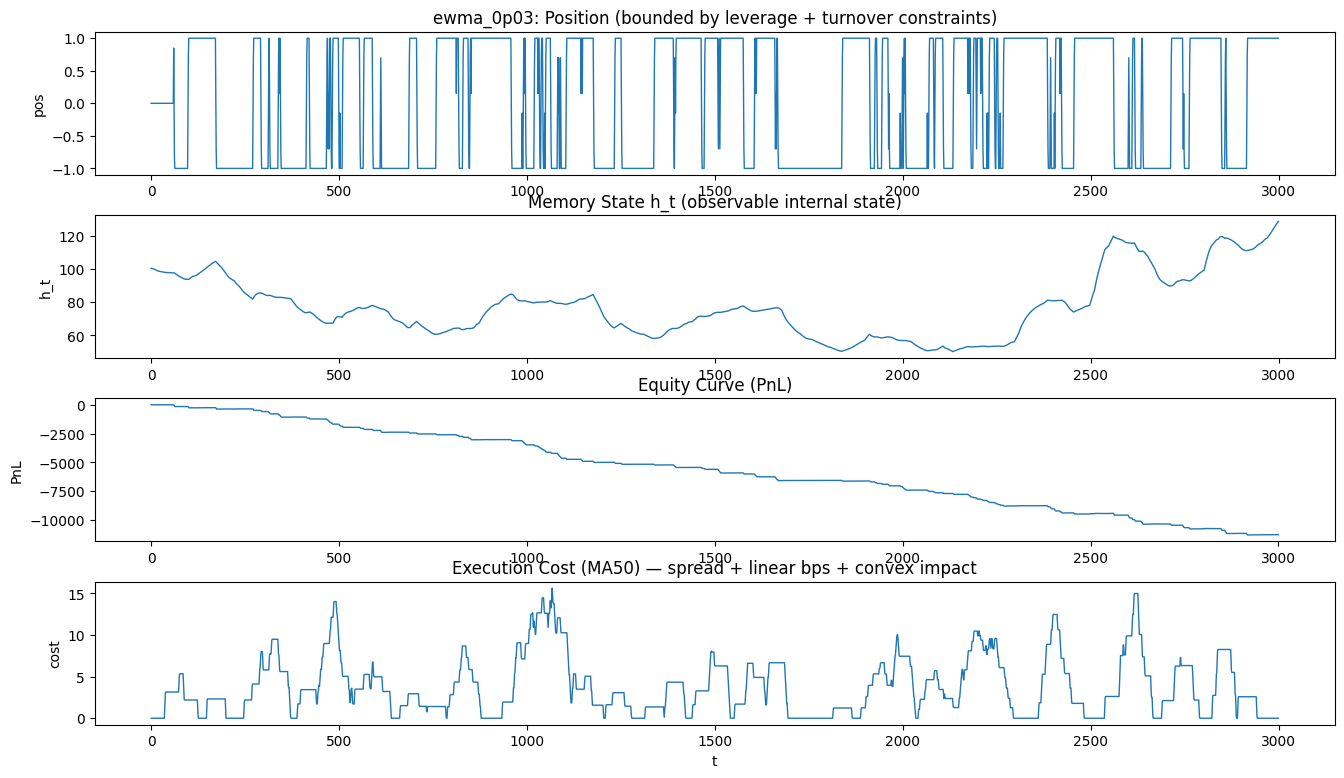

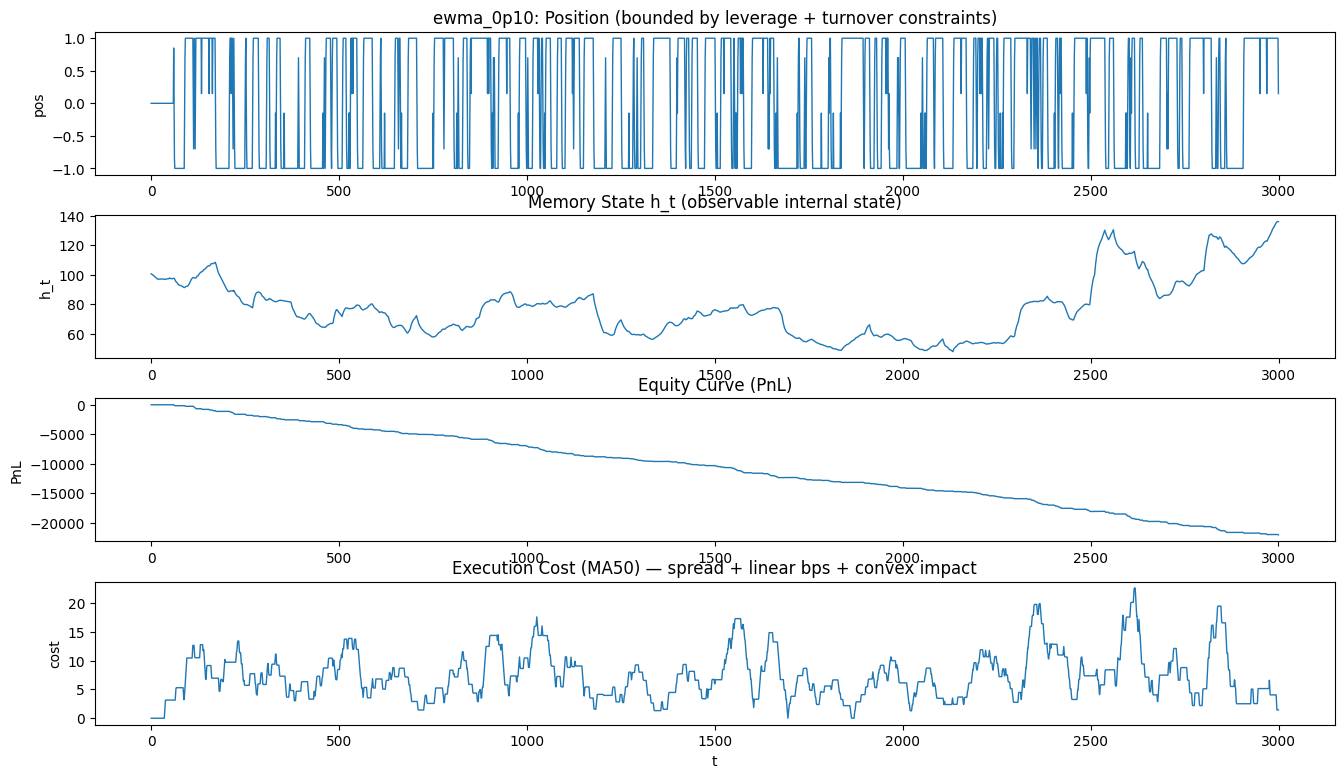

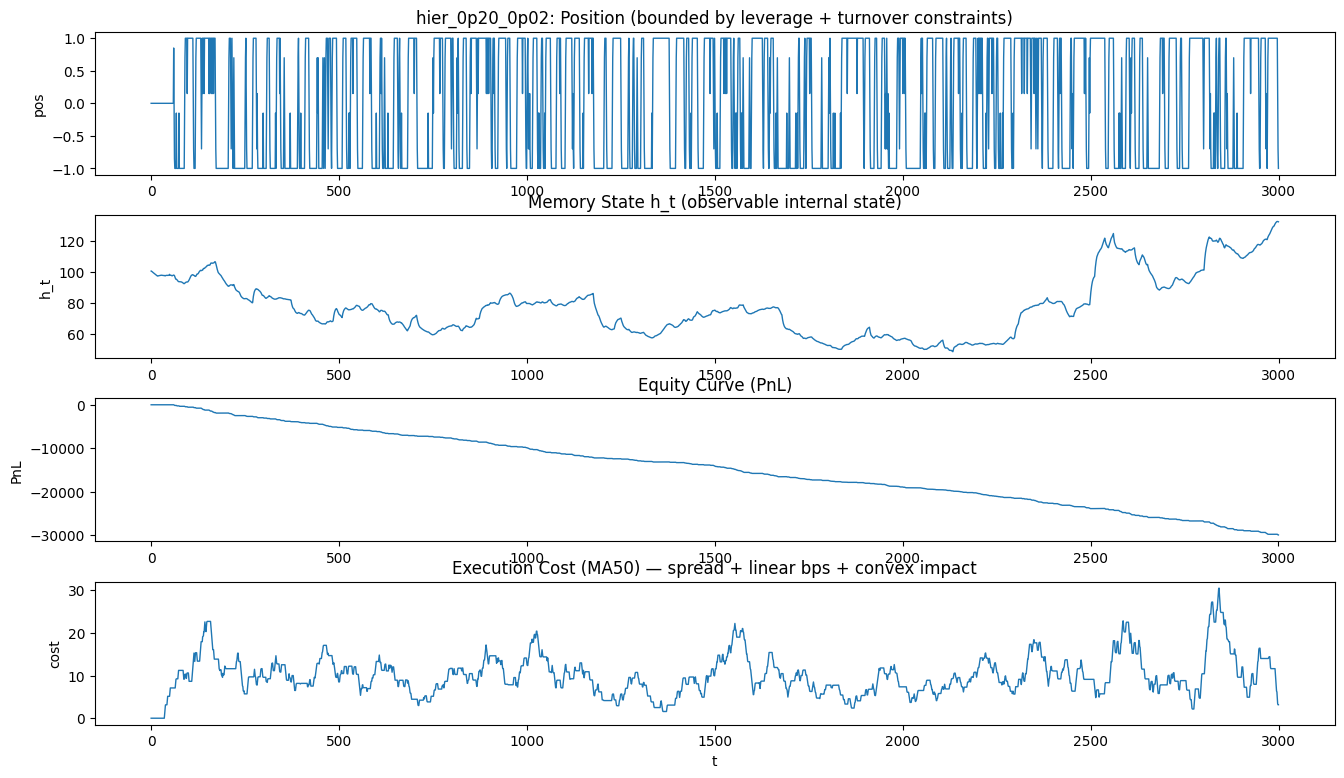

In [15]:
# =============================================================================
# CELL 6 — High-Information Visualization: Regimes, Shocks, Positions, Memory, Costs, Equity
# =============================================================================
def plot_all_agents(results: Dict[str, Any], names: List[str]) -> None:
    prices = results["market"]["prices"]
    regimes = results["market"]["regimes"]
    shocks = results["market"]["shock_flags"]

    # Market top panel
    plt.figure(figsize=(16, 5))
    plt.plot(prices, lw=1.0)
    shock_idx = [i+1 for i, f in enumerate(shocks) if f == 1]
    plt.scatter(shock_idx, [prices[i] for i in shock_idx], s=10, marker="x", label="shock")
    plt.title("Market: Price + Shock Times (Truth)")
    plt.xlabel("t"); plt.ylabel("price"); plt.legend()
    plt.show()

    plt.figure(figsize=(16, 2.2))
    plt.plot(regimes, lw=1.0)
    plt.yticks([0,1,2], ["Bull","Bear","Sideways"])
    plt.title("Latent Regime Path (Truth)")
    plt.xlabel("t")
    plt.show()

    # Agent panels (each agent: pos/mem/equity/cost_ma)
    for nm in names:
        a = results["agents"][nm]
        pos = np.array(a["pos"], float)
        mem = np.array(a["mem"], float)
        eq  = np.array(a["equity"], float)
        cost = np.array(a["cost"], float)
        cost_ma = np.convolve(cost, np.ones(50)/50, mode="same")

        fig = plt.figure(figsize=(16, 9))
        gs = fig.add_gridspec(4, 1, hspace=0.28)

        ax1 = fig.add_subplot(gs[0,0])
        ax1.plot(pos, lw=1.0)
        ax1.set_title(f"{nm}: Position (bounded by leverage + turnover constraints)")
        ax1.set_ylabel("pos")

        ax2 = fig.add_subplot(gs[1,0])
        ax2.plot(mem, lw=1.0)
        ax2.set_title("Memory State h_t (observable internal state)")
        ax2.set_ylabel("h_t")

        ax3 = fig.add_subplot(gs[2,0])
        ax3.plot(eq, lw=1.0)
        ax3.set_title("Equity Curve (PnL)")
        ax3.set_ylabel("PnL")

        ax4 = fig.add_subplot(gs[3,0])
        ax4.plot(cost_ma, lw=1.0)
        ax4.set_title("Execution Cost (MA50) — spread + linear bps + convex impact")
        ax4.set_ylabel("cost")
        ax4.set_xlabel("t")

        plt.show()

plot_all_agents(results, ["instant","roll_20","ewma_0p03","ewma_0p10","hier_0p20_0p02"])


##7.DIAGNOSTICS

###7.1.OVERVIEW

**Cell 7 — PhD diagnostics**  
This cell upgrades evaluation from “final PnL” to structural metrics that separate responsiveness, stability, and tail fragility. First, it computes maximum drawdown on the equity curve, a survival metric that is more informative than variance when shocks and regime shifts exist. Next, it computes Expected Shortfall at 95% on the distribution of PnL increments, treating losses as L = −ΔPnL and averaging beyond the loss quantile. ES is a coherent risk measure and directly targets tail behavior induced by Student-t innovations and shocks. The cell also computes a Sharpe-like ratio on PnL increments, explicitly labeled as non-annualized and comparative; its purpose is to provide a compact stability gauge, not a tradable performance statistic. Turnover is analyzed in two ways: mean absolute turnover (amplitude) and a spectral centroid computed from the FFT magnitude of the turnover series (frequency). The spectral centroid is a PhD-level “churn frequency” proxy: high centroid indicates high-frequency switching behavior consistent with noise chasing; low centroid indicates smoother control. The cell then quantifies lag-to-regime alignment: after each regime switch, it measures how many steps are needed before the sign of position matches the drift sign implied by μ in the new regime (or becomes near-zero in sideways regimes). This is a direct measure of adaptation delay induced by memory. Memory stability itself is evaluated via Δh variance and a kurtosis-like tail proxy on Δh, capturing whether the internal state fluctuates wildly or exhibits heavy-tailed jumps. Finally, the cell builds a 3-class confusion table comparing sign(position) to drift-sign truth labels. This is not “classification accuracy” in the ML sense; it is a structural alignment indicator. Overall, Cell 7 creates a diagnostic dashboard that can explain *why* an agent behaves as it does: high churn frequency, excessive lag, tail fragility, or unstable state dynamics—exactly the axes a professional model risk review would demand.


###7.2.CODE AND IMPLEMENTATION

In [16]:
# =============================================================================
# CELL 7 — PhD Diagnostics: MDD, Tail Risk, Spectral Churn, Lag-to-Regime, Stability, Confusion
# =============================================================================
def max_drawdown(equity: List[float]) -> float:
    peak = -1e18
    mdd = 0.0
    for x in equity:
        peak = max(peak, x)
        mdd = min(mdd, x - peak)
    return float(mdd)

def expected_shortfall(x: np.ndarray, alpha: float = 0.95) -> float:
    """
    ES on losses L = -x (here x are pnl increments).
    """
    assert 0.0 < alpha < 1.0
    L = -x
    q = np.quantile(L, alpha)
    tail = L[L >= q]
    return float(np.mean(tail)) if tail.size else 0.0

def sharpe_like(x: np.ndarray, eps: float = 1e-12) -> float:
    mu = float(np.mean(x))
    sd = float(np.std(x))
    return float(mu / (sd + eps))

def spectral_centroid(signal: np.ndarray, eps: float = 1e-12) -> float:
    """
    Spectral centroid of |FFT| as a proxy for 'churn frequency'.
    Higher => more high-frequency behavior (noise chasing).
    """
    s = signal - np.mean(signal)
    spec = np.abs(np.fft.rfft(s))
    freqs = np.fft.rfftfreq(len(s), d=1.0)
    num = float(np.sum(freqs * spec))
    den = float(np.sum(spec) + eps)
    return num / den

def regime_switch_times(reg: List[int]) -> List[int]:
    return [t for t in range(1, len(reg)) if reg[t] != reg[t-1]]

def avg_lag_to_alignment(pos: np.ndarray, reg: List[int], mu: List[float], horizon: int = 120) -> float:
    """
    Alignment target: sign(mu[regime])  (coarse structural target).
    Lag: steps after switch until sign(pos) == sign(mu) (or near 0 if mu≈0).
    """
    switches = regime_switch_times(reg)
    lags = []
    for t0 in switches:
        target = int(np.sign(mu[reg[t0]]))
        found = None
        for dt in range(horizon):
            t = t0 + dt
            if t >= len(pos): break
            if target == 0:
                if abs(pos[t]) < 0.5: found = dt; break
            else:
                if int(np.sign(pos[t])) == target: found = dt; break
        if found is not None:
            lags.append(found)
    return float(np.mean(lags)) if lags else float("nan")

def confusion_3class(pred: np.ndarray, truth: List[int]) -> Dict[int, Dict[int, int]]:
    labels = [-1,0,1]
    mat = {a:{b:0 for b in labels} for a in labels}
    for y, p in zip(truth, pred):
        y = int(np.sign(y))
        p = int(np.sign(p))
        if y not in labels: y = int(np.sign(y))
        if p not in labels: p = int(np.sign(p))
        mat[y][p] += 1
    return mat

diag: Dict[str, Any] = {}
reg = results["market"]["regimes"]
truth_sign = results["market"]["drift_sign"]

for nm, a in results["agents"].items():
    eq = np.array(a["equity"], float)
    inc = np.array(a["pnl_increments"], float)
    pos = np.array(a["pos"], float)
    mem = np.array(a["mem"], float)
    turn = np.array(a["turn"], float)

    # stability proxy: variance of Δh and tail proxy
    dh = np.diff(mem)
    kurt_proxy = float(np.mean(dh**4) / (np.mean(dh**2)**2 + 1e-12))

    diag[nm] = {
        "final_pnl": float(eq[-1]),
        "max_drawdown": max_drawdown(eq.tolist()),
        "sharpe_like": sharpe_like(inc),
        "ES_95_loss": expected_shortfall(inc, 0.95),

        "turnover_mean_abs": float(np.mean(np.abs(turn))),
        "turnover_p95_abs": float(np.quantile(np.abs(turn), 0.95)),
        "turnover_spectral_centroid": spectral_centroid(turn),

        "mem_diff_var": float(np.var(dh)),
        "mem_diff_kurtosis_proxy": kurt_proxy,

        "avg_lag_to_regime_alignment": avg_lag_to_alignment(pos, reg, CFG.mu),
        "confusion_sign_vs_drift_sign": confusion_3class(np.sign(pos).astype(int), truth_sign),
    }

print(json.dumps(diag, indent=2))
(ARTIFACT_DIR / "diagnostics.json").write_text(json.dumps(diag, indent=2), encoding="utf-8")
print("Saved:", ARTIFACT_DIR / "diagnostics.json")


{
  "instant": {
    "final_pnl": -81867.16400392639,
    "max_drawdown": -81868.02145855295,
    "sharpe_like": -1.2673932271981896,
    "ES_95_loss": 67.16510637958878,
    "turnover_mean_abs": 0.5746999999999999,
    "turnover_p95_abs": 0.85,
    "turnover_spectral_centroid": 0.28227827841903874,
    "mem_diff_var": 3.1912720704216375,
    "mem_diff_kurtosis_proxy": 77.89799388904108,
    "avg_lag_to_regime_alignment": 3.673076923076923,
    "confusion_sign_vs_drift_sign": {
      "-1": {
        "-1": 639,
        "0": 12,
        "1": 509
      },
      "0": {
        "-1": 0,
        "0": 0,
        "1": 0
      },
      "1": {
        "-1": 787,
        "0": 48,
        "1": 1005
      }
    }
  },
  "roll_20": {
    "final_pnl": -18691.48186264588,
    "max_drawdown": -18716.51824050546,
    "sharpe_like": -0.4093428649010319,
    "ES_95_loss": 52.75539245301834,
    "turnover_mean_abs": 0.13623333333333332,
    "turnover_p95_abs": 0.85,
    "turnover_spectral_centroid": 0.2264

##8.STRESS TEST

###8.1.OVERVIEW

**Cell 8 — Stress suite + failure surfaces**  
This cell performs structured stress testing rather than parameter tuning. It defines a grid of environment perturbations—volatility multipliers and shock intensities—and for each scenario it regenerates a stressed market and re-runs the identical agent set. This isolates fragility as a function of environment, not as a function of cherry-picked runs. The stress design reflects standard financial adversaries: higher volatility (amplified diffusion variance), higher shock frequency (greater jump arrival rate), and larger shock magnitude (fatter jump distribution). It also escalates spreads under stress, increasing friction in precisely the states where turnover tends to rise. For each scenario and each selected agent, the cell records a compact metric vector (final PnL, max drawdown, Sharpe-like, mean turnover). Then it applies didactic failure rules: drawdown breach, turnover spike, and PnL collapse. These are not claims about capital adequacy; they are structural triggers that identify where a memory design crosses a feasibility cliff—typically where convex impact penalizes rapid switching or where lag causes persistent wrong-way exposure during regime transitions. The cell logs all flagged failures into a risk log artifact, producing a reviewable catalogue of “what breaks, when, and how.” It also plots scenario-indexed traces of final PnL for multiple agents. This plot is a crude but effective phase diagram: if one agent collapses as shocks intensify while another degrades gracefully, you have learned something fundamental about memory stability under nonstationarity. The point is not to select the best agent; the point is to discover failure surfaces and to tie them back to memory filter properties (from Cell 3) and control/constraint interactions (from Cell 4). This is the bridge from “memory as state” to “memory as risk factor” in governed systems.


###8.2.CODE AND IMPLEMENTATION

/tmp/ipython-input-3630170980.py:20: RuntimeWarning: invalid value encountered in divide
  pi = pi / pi.sum()


Stress scenarios: 24 | Failures: 72


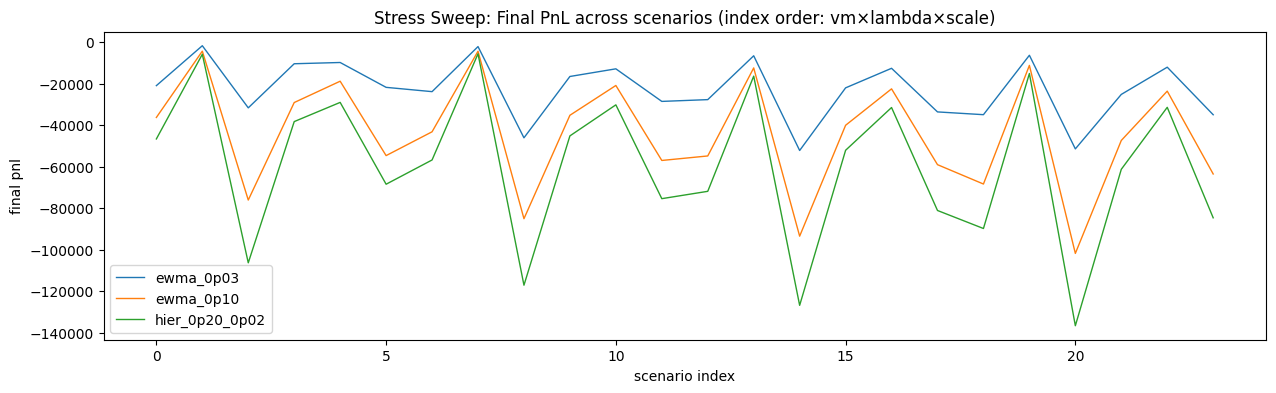

In [17]:
# =============================================================================
# CELL 8 — Deep Stress Suite: Phase Diagrams (alpha vs shocks) + Failure Surfaces
# =============================================================================
def stress_market(cfg: ExperimentConfig, vol_mult: float, shock_lambda: float, shock_scale: float) -> Dict[str, Any]:
    cfg2 = ExperimentConfig(
        seed=cfg.seed + int(1e5 * (vol_mult + shock_lambda + shock_scale)) % 10_000,
        T=cfg.T,
        init_price=cfg.init_price,
        dt=cfg.dt,
        n_regimes=cfg.n_regimes,
        transition_matrix=cfg.transition_matrix,

        mu=cfg.mu,
        sigma=[s * vol_mult for s in cfg.sigma],
        nu=cfg.nu,

        shock_lambda=shock_lambda,
        shock_scale=shock_scale,
        shock_bias=cfg.shock_bias,

        spread_bps=[b * (1.0 + 0.4*(vol_mult-1.0)) for b in cfg.spread_bps],
        shock_spread_mult=cfg.shock_spread_mult,

        leverage_cap=cfg.leverage_cap,
        turnover_cap=cfg.turnover_cap,

        cost_bps=cfg.cost_bps,
        impact_eta=cfg.impact_eta,
        impact_gamma=cfg.impact_gamma,

        warmup=cfg.warmup
    )
    return generate_market(cfg2)

def score_agent(res: Dict[str, Any], agent: str) -> Dict[str, float]:
    a = res["agents"][agent]
    eq = np.array(a["equity"], float)
    inc = np.array(a["pnl_increments"], float)
    turn = np.array(a["turn"], float)
    return {
        "final_pnl": float(eq[-1]),
        "mdd": max_drawdown(eq.tolist()),
        "sharpe_like": sharpe_like(inc),
        "turn_mean": float(np.mean(np.abs(turn))),
    }

# Stress grid
vol_mults = [1.0, 1.4, 1.8, 2.2]
lambdas   = [0.015, 0.03, 0.06]
scales    = [0.11, 0.16]

agents_for_surface = ["ewma_0p03", "ewma_0p10", "hier_0p20_0p02"]
grid_rows = []
failures = []

# failure rules (didactic thresholds)
DD_FAIL = -0.45 * CFG.init_price
TURN_FAIL = 0.85
PNL_FAIL = -0.35 * CFG.init_price

for vm in vol_mults:
    for lam in lambdas:
        for sc in scales:
            mkt_s = stress_market(CFG, vm, lam, sc)
            ag = build_agents(CFG)  # uses CFG costs/constraints; ok because stress is market-side
            res = run_simulation(CFG, mkt_s, ag)

            row = {"vm": vm, "lambda": lam, "scale": sc, "metrics": {}}
            for an in agents_for_surface:
                met = score_agent(res, an)
                row["metrics"][an] = met

                fm = []
                if met["mdd"] < DD_FAIL: fm.append("drawdown_breach")
                if met["turn_mean"] > TURN_FAIL: fm.append("turnover_spike")
                if met["final_pnl"] < PNL_FAIL: fm.append("pnl_collapse")
                if fm:
                    failures.append({"scenario": {"vm": vm, "lambda": lam, "scale": sc}, "agent": an, "failure_modes": fm})

            grid_rows.append(row)

stress_log = {"grid": grid_rows, "failures": failures}
(ARTIFACT_DIR / "risk_log.json").write_text(json.dumps(stress_log, indent=2), encoding="utf-8")
print("Stress scenarios:", len(grid_rows), "| Failures:", len(failures))

# Visual surface: final_pnl vs scenario index for each agent
plt.figure(figsize=(15,4))
for an in agents_for_surface:
    vals = [r["metrics"][an]["final_pnl"] for r in grid_rows]
    plt.plot(vals, lw=1.0, label=an)
plt.title("Stress Sweep: Final PnL across scenarios (index order: vm×lambda×scale)")
plt.xlabel("scenario index")
plt.ylabel("final pnl")
plt.legend()
plt.show()


##9.FINANCIAL INTERPETATION

###9.1.0VERVIEW

**Cell 9 — Financial interpretation artifact**  
This cell writes the interpretive layer that connects the lab’s mechanics to finance practice, and it does so in a governance-compatible way. First, it frames memory operators as classical estimators: rolling mean corresponds to finite-window moving averages; EWMA corresponds to exponentially weighted estimators widely used in volatility and risk (e.g., RiskMetrics-style smoothing); hierarchical memory corresponds to multi-timescale aggregation, analogous to how institutions process information across desks, risk committees, and boards. Second, it explains the core tradeoff revealed by the filter lens: stronger smoothing reduces noise sensitivity but increases phase lag; weaker smoothing improves responsiveness but increases churn and execution cost exposure. Third, it reiterates why the policy was held fixed: to prevent optimization from confounding the memory effect. This is important for PhD-level causal reasoning: you want an identification strategy, not a backtest contest. The cell then articulates governance implications: forgetting is not a deficiency but a bounded-state control that reduces regime poisoning and narrative overfitting. It highlights that “more context” is not always better because nonstationary systems punish stale information. Finally, it explicitly labels the work as “Not Verified,” and it enumerates what would be required for real-world validation: sensitivity to transition dynamics, tail parameters, multi-asset correlation structure, and more realistic microstructure. By saving this interpretation as a durable artifact, the notebook produces not only numbers but a defensible explanation that can accompany diagnostics in a review packet. In regulated or institutional environments, this matters: reviewers do not accept raw metrics without a causal story grounded in mechanisms. This cell creates that mechanism-grounded narrative while maintaining strict boundaries: synthetic data, educational purpose, and no investment claims.


###9.2.CODE AND IMPLEMENTATION

In [18]:
# =============================================================================
# CELL 9 — Formal Interpretation: Memory = Filter + Lag/Churn Trade-off (PhD narrative)
# =============================================================================
text = r"""
# Chapter 1 Interpretation — Memory as State (PhD-Level)

## 1) Memory operators are linear filters (in the simplest setting)
Rolling mean is an FIR low-pass filter with a sinc-like frequency response. EWMA is an IIR low-pass filter
with transfer function H(z) = a / (1 - (1-a) z^{-1}). Smaller a implies stronger attenuation of high-frequency noise
but increases phase lag, which appears as delayed regime adaptation.

## 2) Trading policy is fixed to isolate the memory channel
We intentionally avoid learning/optimization. With a_t = sign(Δh_t), differences in behavior are causally attributable
to the memory operator (state evolution) rather than parameter fitting.

## 3) Professional finance mapping (not metaphorical; structural)
- Rolling mean ↔ moving average signal construction; equivalently, a finite-memory estimator.
- EWMA ↔ exponential weighting used in risk (EWMA volatility) and signal smoothing.
- Hierarchical EWMA ↔ multi-timescale institutional memory: desk (fast), risk committee (slow), board (slowest).

## 4) Governance-first insight
Infinite accumulation is not "more information"; it is an unstable state under nonstationarity.
Forgetting is a control: it bounds sensitivity to obsolete regimes and reduces narrative overfitting.

## 5) Diagnostics are structural, not performance claims
- Spectral centroid of turnover approximates 'churn frequency' (noise chasing).
- Lag-to-regime alignment quantifies delayed adaptation.
- ES(95%) on PnL increments measures tail fragility under heavy tails and shocks.

## 6) What remains Not Verified
All claims are about synthetic structure. Verification requires:
- sensitivity to transition dynamics P
- sensitivity to heavy-tail degrees of freedom
- multi-asset correlation and liquidity coupling
- nonlinear microstructure models (impact, queueing, partial fills)
"""
print(text.strip())
(ARTIFACT_DIR / "financial_interpretation.md").write_text(text.strip() + "\n", encoding="utf-8")
print("Saved:", ARTIFACT_DIR / "financial_interpretation.md")


# Chapter 1 Interpretation — Memory as State (PhD-Level)

## 1) Memory operators are linear filters (in the simplest setting)
Rolling mean is an FIR low-pass filter with a sinc-like frequency response. EWMA is an IIR low-pass filter
with transfer function H(z) = a / (1 - (1-a) z^{-1}). Smaller a implies stronger attenuation of high-frequency noise
but increases phase lag, which appears as delayed regime adaptation.

## 2) Trading policy is fixed to isolate the memory channel
We intentionally avoid learning/optimization. With a_t = sign(Δh_t), differences in behavior are causally attributable
to the memory operator (state evolution) rather than parameter fitting.

## 3) Professional finance mapping (not metaphorical; structural)
- Rolling mean ↔ moving average signal construction; equivalently, a finite-memory estimator.
- EWMA ↔ exponential weighting used in risk (EWMA volatility) and signal smoothing.
- Hierarchical EWMA ↔ multi-timescale institutional memory: desk (fast), risk commit

##10.AUDIT BUNDLE

###10.1.OVERVIEW

**Cell 10 — Governance closure + hash ledger**  
This cell closes the notebook like an audited experiment. It first enumerates all files written to the artifact directory and computes a SHA-256 hash for each. The resulting hash ledger is a simple integrity mechanism: if any artifact is modified later—accidentally or intentionally—the hash changes and the alteration is detectable. This is a minimal but meaningful control for reproducibility in computational research. Next, the cell writes the verification register, which is the canonical governance record: it lists facts provided (what the notebook actually implemented), assumptions (what structural choices were made, such as stationary regime transitions and lognormal price updates), limitations (what the lab does not model, like multi-asset coupling, queueing microstructure, funding constraints), and open questions (what must be studied next to extend rigor). It also explicitly states that human review is required and that verification status remains “Not Verified.” This prevents downstream misuse and sets the correct professional posture: the notebook is a laboratory for understanding memory, not a production strategy. The register includes a deliverables list, ensuring reviewers know which files constitute the experimental record. Conceptually, this cell enforces the idea that governance is not a disclaimer appended to the end—it is a structured, auditable closure that binds together the manifest, diagnostics, stress logs, and interpretation into a reviewable package. In a PhD or institutional setting, this is how you defend your work: you can show exactly what was run, under what environment, with what parameters, what it produced, how it failed under stress, and what remains unknown. The cell’s outputs are therefore not “extras”; they are the minimal compliance layer that makes the computational experiment trustworthy enough to discuss seriously in finance.


###10.2.CODE AND IMPLEMENTATION

In [19]:
# =============================================================================
# CELL 10 — Governance Closure: Verification Register + Artifact Index + Hash Ledger
# =============================================================================
def write_json(path: Path, obj: Any) -> None:
    path.write_text(json.dumps(obj, indent=2), encoding="utf-8")

# Artifact index + hashes
files = sorted([p for p in ARTIFACT_DIR.glob("*") if p.is_file()])
ledger = [{"file": p.name, "sha256": file_sha256(p)} for p in files]
write_json(ARTIFACT_DIR / "hash_ledger.json", ledger)

verification_register = {
    "run_id": RUN_ID,
    "timestamp_utc": utc_now_iso(),
    "verification_status": "Not Verified",
    "facts_provided": [
        "Regime-switching synthetic market with Student-t innovations and compound shocks",
        "Execution model with spread + linear bps + convex impact",
        "Memory operators treated as dynamical systems and filters with frequency response",
        "Diagnostics: drawdown, ES tail loss, spectral churn, regime-lag, stability proxies",
        "Stress suite producing failure logs across volatility/shock intensities"
    ],
    "assumptions": [
        "Time-homogeneous Markov regime transitions",
        "Lognormal price update with additive log-returns",
        "Costs depend on turnover; convex impact is stylized power law",
        "Single-asset; no cross-asset correlation or crowding"
    ],
    "limitations": [
        "No parameter calibration to real data",
        "Policy is fixed by design; not an optimizer",
        "Microstructure simplified: no limit order book / partial fills / queue position",
        "No funding constraints / margin calls / volatility targeting"
    ],
    "open_questions": [
        "How do conclusions change under multi-asset correlation compression and liquidity coupling?",
        "How do memory operators interact with execution feedback (impact -> state)?",
        "What governance controls prevent memory poisoning in real agent deployments?"
    ],
    "human_review_required": True,
    "deliverables": [p.name for p in files] + ["hash_ledger.json"],
}

write_json(ARTIFACT_DIR / "verification_register.json", verification_register)

print("=== GOVERNANCE CLOSURE ===")
print("Verification Status: Not Verified")
print("Artifacts:")
for p in sorted([x.name for x in ARTIFACT_DIR.glob("*")]):
    print(" -", p)
print("Hash ledger written:", ARTIFACT_DIR / "hash_ledger.json")


=== GOVERNANCE CLOSURE ===
Verification Status: Not Verified
Artifacts:
 - diagnostics.json
 - financial_interpretation.md
 - hash_ledger.json
 - risk_log.json
 - run_manifest.json
 - verification_register.json
Hash ledger written: artifacts_ch1/hash_ledger.json


In [20]:
# ==============================================================
# CREATE A SINGLE GOVERNANCE STORE FILE (CONSOLIDATED)
# Writes: artifacts_ch1/governance_store.json
# ==============================================================

import json
from pathlib import Path
from datetime import datetime, timezone

ARTIFACT_DIR = Path("artifacts_ch1")
assert ARTIFACT_DIR.exists(), f"Expected folder not found: {ARTIFACT_DIR.resolve()}"

def utc_now_iso() -> str:
    return datetime.now(timezone.utc).isoformat()

def read_json_if_exists(p: Path):
    if p.exists():
        return json.loads(p.read_text(encoding="utf-8"))
    return None

def read_text_if_exists(p: Path):
    if p.exists():
        return p.read_text(encoding="utf-8")
    return None

# 1) Show directory contents (this answers "where are my files?")
files = sorted([x.name for x in ARTIFACT_DIR.glob("*") if x.is_file()])
print("Found artifacts in:", ARTIFACT_DIR.resolve())
for f in files:
    print(" -", f)

# 2) Consolidate governance into one master file
governance_store = {
    "generated_at_utc": utc_now_iso(),
    "verification_status": "Not Verified",
    "artifact_directory": str(ARTIFACT_DIR.resolve()),
    "files_present": files,

    # canonical governance artifacts
    "run_manifest": read_json_if_exists(ARTIFACT_DIR / "run_manifest.json"),
    "diagnostics": read_json_if_exists(ARTIFACT_DIR / "diagnostics.json"),
    "risk_log": read_json_if_exists(ARTIFACT_DIR / "risk_log.json"),
    "verification_register": read_json_if_exists(ARTIFACT_DIR / "verification_register.json"),
    "hash_ledger": read_json_if_exists(ARTIFACT_DIR / "hash_ledger.json"),

    # optional narrative artifact
    "financial_interpretation_md": read_text_if_exists(ARTIFACT_DIR / "financial_interpretation.md"),
}

out_path = ARTIFACT_DIR / "governance_store.json"
out_path.write_text(json.dumps(governance_store, indent=2), encoding="utf-8")

print("\n✅ Consolidated governance file created:")
print(out_path.resolve())


Found artifacts in: /content/artifacts_ch1
 - diagnostics.json
 - financial_interpretation.md
 - hash_ledger.json
 - risk_log.json
 - run_manifest.json
 - verification_register.json

✅ Consolidated governance file created:
/content/artifacts_ch1/governance_store.json


##11.CONCLUSION

**Conclusion — Memory as State: What You Now Know, and What You Must Not Confuse (≈1500 words)**  
If this chapter has done its job, “memory” no longer sounds like a software feature. It no longer evokes a database, a chat history, or a retrieval plugin. Memory now appears in its correct form: a dynamical object that determines what an agent is, what it can perceive, and how it behaves under uncertainty. In finance, this is not philosophical. It is operational. A portfolio, a strategy, and an institution all behave as stateful systems. They remember, they forget, they filter, and they act. In modern agentic AI, the same structure holds: without a disciplined state evolution, long-horizon behavior becomes unstable, irreproducible, or dangerously overconfident. This chapter therefore does not merely teach memory; it teaches the anatomy of temporal decision systems.

The first durable lesson is that memory is a filter. Once you treat memory operators as filters, all the familiar tradeoffs become measurable. A rolling mean is not “smoothing” in a vague sense; it is a finite impulse response low-pass filter with a window-defined frequency response and a corresponding phase lag. An EWMA is not “forgetting” as a psychological metaphor; it is an infinite impulse response filter with a time constant that you can compute and a stability property that you can reason about. A hierarchical memory is not “more advanced”; it is a multi-timescale decomposition that balances reactivity and stability through explicit coupling. From this perspective, the right question is not “does the agent have memory,” but “what spectral content does the memory allow into the state.” If the memory passes too much high-frequency noise, the agent churns; if it suppresses too much, the agent lags and misses transitions. This is the first controlled vocabulary you should carry forward: bandwidth, attenuation, inertia, phase lag, and stability.

The second lesson is causal identification. In most quantitative workflows, memory is hidden inside other decisions. A strategy is tuned, a model is trained, and the practitioner credits performance to “the signal” or “the model.” But when multiple mechanisms move at once, no mechanism is truly understood. This chapter forces a scientific posture: the policy is fixed, learning is excluded, and only memory changes. That design choice is what makes the lab legitimate at a PhD level: it distinguishes explanation from curve fitting. You can now say, with intellectual honesty, that the differences you observe across agents arise from differences in state evolution. This posture is not optional if you intend to build governed systems. Without causal clarity, you cannot produce credible model risk arguments, you cannot predict failure modes, and you cannot defend design decisions under scrutiny.

The third lesson is feasibility: memory interacts with costs. Finance is full of educational material that treats execution as an afterthought and costs as a minor adjustment. That is not professional finance. In reality, costs are a state-dependent surface that can dominate outcomes. The execution model in this chapter is intentionally simplified, but it is structured correctly: spread widens in stress, linear fees accumulate with turnover, and convex impact creates cliffs. Memory operators that generate rapid oscillations are punished not merely by “being noisy,” but by stepping into punitive regions of a convex cost function. This is what makes some strategies structurally non-scalable even if their pre-cost returns look appealing. The important conclusion is that memory choice is not only about prediction quality; it is about economic feasibility under real frictions. The memory operator determines turnover statistics, and turnover determines whether the strategy lives in a low-cost region or repeatedly triggers cost explosions. This is the most finance-native interpretation of memory as state: the state you construct determines the trades you make, and the trades you make determine your microstructure bill.

The fourth lesson is that forgetting is not a weakness; forgetting is a control. Many people assume that the best systems are those that remember the most. That intuition is exactly wrong in nonstationary environments. Markets change regimes. Correlations compress. Liquidity evaporates. The long past becomes irrelevant, then actively harmful. In such settings, unbounded memory is a liability: it injects stale structure into current decisions. Forgetting is the mechanism that bounds state and prevents poisoning. In the laboratory, forgetting is implemented via exponential decay and finite windows; in real systems, forgetting appears as recency weighting, regime-dependent filters, and hierarchical summaries that decide what persists and what is discarded. The philosophical consequence is practical: “more context” is not an objective; “better state representation” is the objective. This is a foundational bridge to later chapters: long context windows and external memory stores only help if you can compress them into stable state variables that preserve relevance under drift.

The fifth lesson is governance as a design constraint. The notebook does not just compute; it produces artifacts: manifests, diagnostics, risk logs, verification registers, and integrity hashes. That is not bureaucracy. That is the minimum scaffold required to treat a computational system as a professional object. In finance, a model that cannot be reproduced is not a model; it is a story. In agentic AI, an agent that cannot explain what it remembered, why it remembered it, and how that memory changed its action is not a tool; it is a latent liability. Governance-first design forces you to record intent (config), identity (environment fingerprint), outcome (diagnostics), adversity (stress logs), and uncertainty (open questions). This is not merely compliance; it is epistemic hygiene. It prevents the most damaging failure mode in both finance and AI: the illusion of understanding.

Now, what must you not confuse? First, do not confuse this laboratory with an investing recipe. The policy is intentionally simplistic, and the market is synthetic. The purpose is not to discover alpha; it is to expose mechanism. Second, do not confuse good-looking curves with stable design. A strategy can look good on one path and be structurally fragile; this is why stress testing exists and why spectral churn and tail risk metrics were included. Third, do not confuse “memory length” with “memory quality.” A longer memory can be worse if it admits stale regimes; a shorter memory can be worse if it chases noise. The correct language is not length, but time constant, bandwidth, and hierarchical structure.

Finally, what is the forward path from here? This chapter gives you the correct mental model: memory is a state constructor. The next question is: what happens when the observation stream is not a single scalar price, but a long, messy, heterogeneous context—news, fundamentals, filings, transcripts, macro data, and internal decisions? That is where “context as geometry” becomes essential: once memory becomes high-dimensional, relevance competes with interference, and the stability of state construction becomes a geometric problem. Then, once you allow the agent to operate over longer horizons with planning and feedback, memory becomes inseparable from temporal intelligence: not just reacting, but maintaining coherent belief and action over many steps under partial observability.

But none of that is possible unless you have internalized what you learned here. Memory is not storage. Memory is state. State is filter. Filter implies lag and churn. Lag and churn interact with regime shifts and execution costs. Those interactions define failure surfaces. Governance makes those surfaces visible and reviewable. If you carry only one statement out of this chapter, carry this one: the most important design decision in an agent is not its policy, and not its model size, but the structure by which it remembers. In finance as in AI, state is destiny.
